In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv("C:/Users/user/OneDrive/Desktop/first inten project.csv")

In [3]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [5]:
data.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [6]:
col = data.columns
for c in col:
  print(c)
  print(data[c].unique())
  print('--------------------------')

Booking_ID
['INN00001' 'INN00002' 'INN00003' ... 'INN36284' 'INN36285' 'INN36286']
--------------------------
number of adults
[1 2 3 0 4]
--------------------------
number of children
[ 1  0  2  3 10  9]
--------------------------
number of weekend nights
[2 1 0 4 3 6 5 7]
--------------------------
number of week nights
[ 5  3  2  4  0  1 10  6 11  7 15  9 13  8 14 12 17 16]
--------------------------
type of meal
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
--------------------------
car parking space
[0 1]
--------------------------
room type
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
--------------------------
lead time
[224   5   1 211  48 346  34  83 121  44   0  35  30  95  47 256  99  12
 122   2  37 130  60  56   3 107  72  23 289 247 186  64  96  41  55 146
  32  57   7 124 169   6  51  13 100 139 117  39  86  19 192 179  26  74
 143 177  18 267 155  46 128  20  40 196 188  17 110  68  73  92 171 134
 32

In [7]:
data.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [8]:

label_encoder = LabelEncoder()
data['type of meal'] = label_encoder.fit_transform(data['type of meal'])
data['room type'] = label_encoder.fit_transform(data['room type'])
data['market segment type'] = label_encoder.fit_transform(data['market segment type'])
data['booking status'] = label_encoder.fit_transform(data['booking status'])

In [9]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,0,0,0,224,3,0,0,0,88.00,0,10/2/2015,1
1,INN00002,1,0,1,3,3,0,0,5,4,0,0,0,106.68,1,11/6/2018,1
2,INN00003,2,1,1,3,0,0,0,1,4,0,0,0,50.00,0,2/28/2018,0
3,INN00004,1,0,0,2,0,0,0,211,4,0,0,0,100.00,1,5/20/2017,0
4,INN00005,1,0,1,2,3,0,0,48,4,0,0,0,77.00,0,4/11/2018,0


In [10]:
data['date of reservation'] = pd.to_datetime(data['date of reservation'], errors='coerce')
data = data.dropna(subset=['date of reservation'])

In [11]:
data['year'] = data['date of reservation'].dt.year
data['month'] = data['date of reservation'].dt.month
data['day'] = data['date of reservation'].dt.day

In [12]:
data.drop(['Booking_ID', 'date of reservation'], axis=1, inplace=True)

In [13]:
data.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,year,month,day
0,1,1,2,5,0,0,0,224,3,0,0,0,88.00,0,1,2015,10,2
1,1,0,1,3,3,0,0,5,4,0,0,0,106.68,1,1,2018,11,6
2,2,1,1,3,0,0,0,1,4,0,0,0,50.00,0,0,2018,2,28
3,1,0,0,2,0,0,0,211,4,0,0,0,100.00,1,0,2017,5,20
4,1,0,1,2,3,0,0,48,4,0,0,0,77.00,0,0,2018,4,11


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36248 entries, 0 to 36284
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36248 non-null  int64  
 1   number of children        36248 non-null  int64  
 2   number of weekend nights  36248 non-null  int64  
 3   number of week nights     36248 non-null  int64  
 4   type of meal              36248 non-null  int32  
 5   car parking space         36248 non-null  int64  
 6   room type                 36248 non-null  int32  
 7   lead time                 36248 non-null  int64  
 8   market segment type       36248 non-null  int32  
 9   repeated                  36248 non-null  int64  
 10  P-C                       36248 non-null  int64  
 11  P-not-C                   36248 non-null  int64  
 12  average price             36248 non-null  float64
 13  special requests          36248 non-null  int64  
 14  booking sta

In [15]:
col = data.columns
for c in col:
  print(c)
  print(data[c].unique())
  print('----------------------------')

number of adults
[1 2 3 0 4]
----------------------------
number of children
[ 1  0  2  3 10  9]
----------------------------
number of weekend nights
[2 1 0 4 3 6 5 7]
----------------------------
number of week nights
[ 5  3  2  4  0  1 10  6 11  7 15  9 13  8 14 12 17 16]
----------------------------
type of meal
[0 3 1 2]
----------------------------
car parking space
[0 1]
----------------------------
room type
[0 3 1 5 4 6 2]
----------------------------
lead time
[224   5   1 211  48 346  34  83 121  44   0  35  30  95  47 256  99  12
 122   2  37 130  60  56   3 107  72  23 289 247 186  64  96  41  55 146
  32  57   7 124 169   6  51  13 100 139 117  39  86  19 192 179  26  74
 143 177  18 267 155  46 128  20  40 196 188  17 110  68  73  92 171 134
 320 118 189  16  24   8  10 182 116 123 105 443 317 286 148  14  85  25
  28  80  11 162  82  27 245 266 112  88  69 273   4  97  31  62 197 280
 185 160 104  22 292 109 126 303  81  54  15 161 147  87 127 418 156  58
 433 111 195 1

In [16]:
data = data.drop_duplicates()

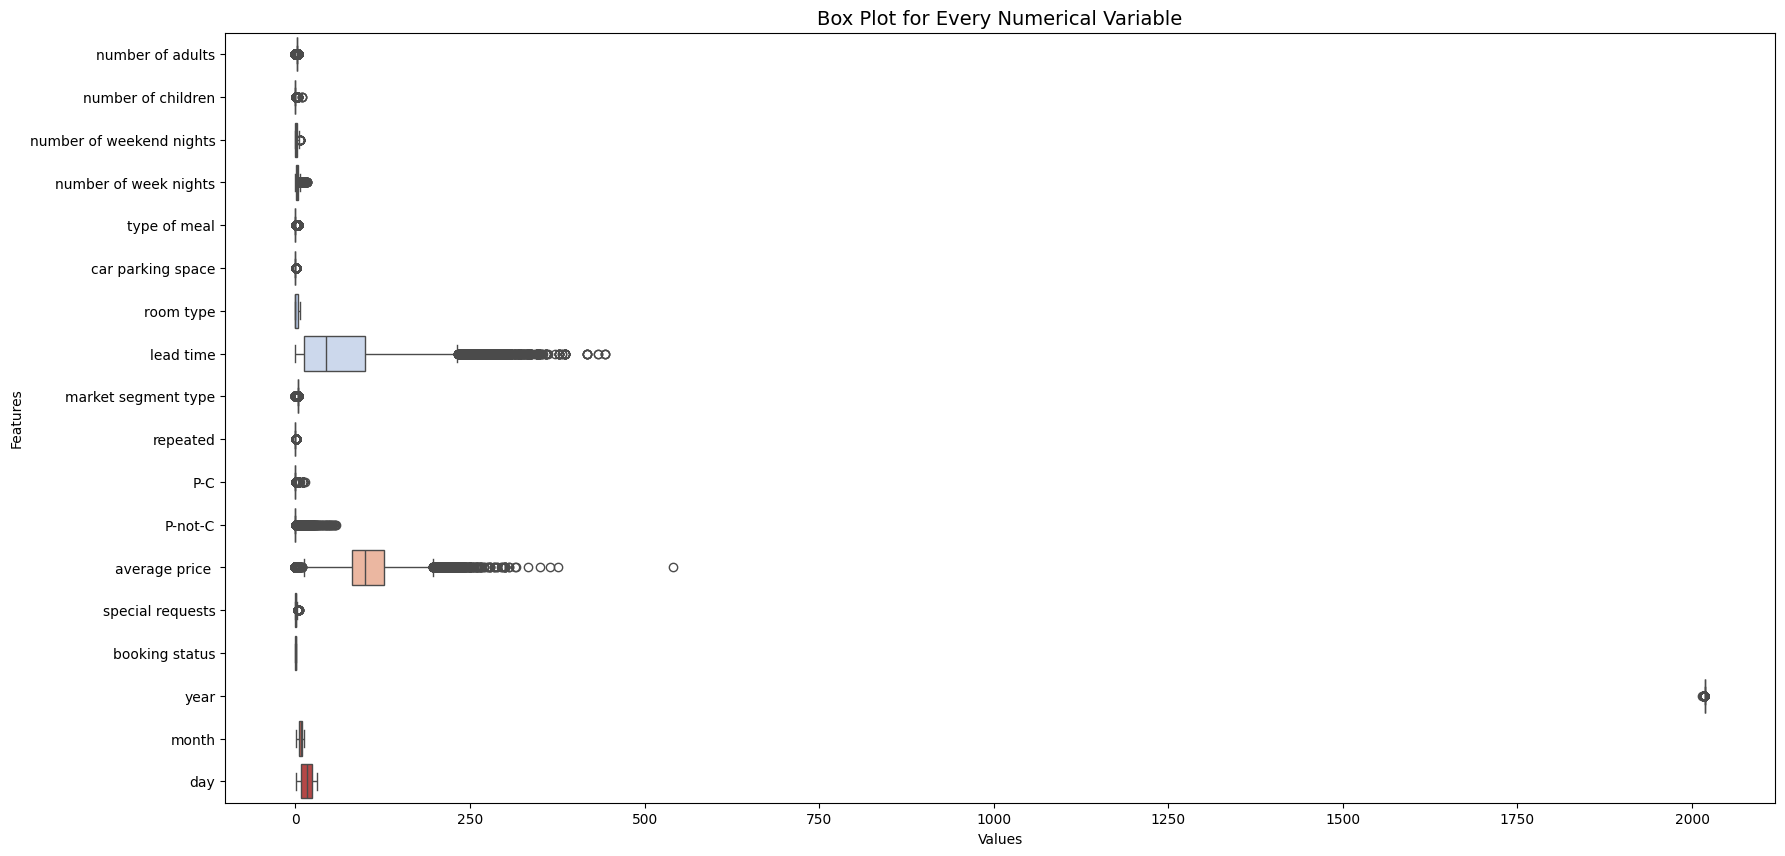

In [17]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=data, orient="h", palette="coolwarm")
plt.title("Box Plot for Every Numerical Variable", fontsize=14)
plt.xlabel("Values")
plt.ylabel("Features")

plt.show()

In [18]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numeric_columns = data.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    data = remove_outliers_iqr(data, col)

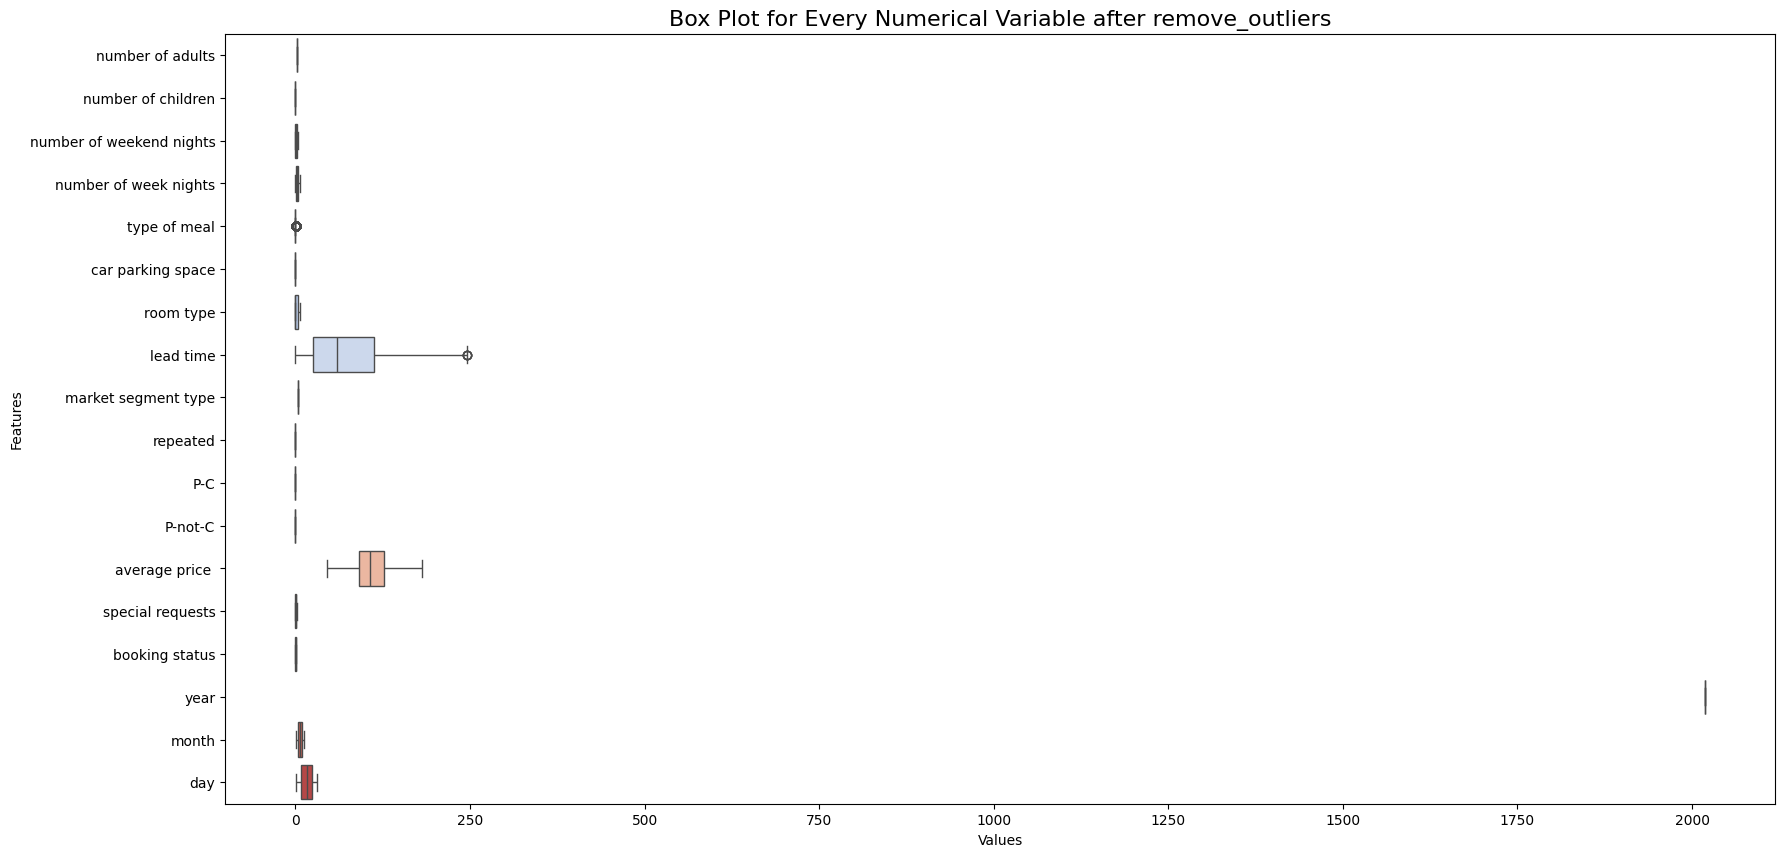

In [19]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=data, orient="h", palette="coolwarm")
plt.title("Box Plot for Every Numerical Variable after remove_outliers", fontsize=16)
plt.xlabel("Values")
plt.ylabel("Features")

plt.show()

In [20]:
columns_to_scale = ['type of meal', 'room type', 'market segment type', 'year', 'month', 'day']
scaler = StandardScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [21]:
from sklearn.feature_selection import RFE, SelectKBest, f_classif, SelectFromModel, mutual_info_classif

In [22]:
X = data.drop(columns=['booking status'])
y = data['booking status']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
models = {
    'RandomForest': (RandomForestClassifier(random_state=42), {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    'LogisticRegression': (LogisticRegression(), {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    }),
    'DecisionTree': (DecisionTreeClassifier(random_state=42), {
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    'MLPClassifier': (MLPClassifier(random_state=42), {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive']
    })
}

In [25]:
rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)
rfe.fit(X_train, y_train)
selected_features_rfe = X.columns[rfe.support_]

In [26]:
selected_features_rfe

Index(['number of weekend nights', 'number of week nights', 'type of meal',
       'room type', 'lead time', 'average price ', 'special requests', 'year',
       'month', 'day'],
      dtype='object')

In [27]:
X_selected = X[selected_features_rfe]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [29]:
best_model_rfe = None
best_accuracy_rfe = 0

for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_estimator = grid_search.best_estimator_
    y_pred = best_estimator.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{model_name} Accuracy: {accuracy}")
    
    if accuracy > best_accuracy_rfe:
        best_accuracy_rfe = accuracy
        best_model_rfe = best_estimator
    
print(best_model_rfe, "Accuracy:", best_accuracy_rfe)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
RandomForest Accuracy: 0.8123667377398721
Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\user\OneDrive\Desktop\Task3_Mohammad-Al-Quraan\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy: 0.7611940298507462
Fitting 5 folds for each of 9 candidates, totalling 45 fits
DecisionTree Accuracy: 0.7839374555792467
Fitting 5 folds for each of 72 candidates, totalling 360 fits
MLPClassifier Accuracy: 0.7917555081734187
RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42) Accuracy: 0.8123667377398721


In [30]:
y_pred = best_model_rfe.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [31]:
print(cm)
print('Accuracy =', accuracy)
print(cr)

[[360 151]
 [113 783]]
Accuracy = 0.8123667377398721
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       511
           1       0.84      0.87      0.86       896

    accuracy                           0.81      1407
   macro avg       0.80      0.79      0.79      1407
weighted avg       0.81      0.81      0.81      1407



In [32]:
y_train_pred = best_model_rfe.predict(X_train)
y_test_pred = best_model_rfe.predict(X_test)

In [33]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(train_accuracy)
print(test_accuracy)

0.8637980085348507
0.8123667377398721


In [34]:
import pickle

In [35]:
with open('best_model_selected_features.pkl', 'wb') as file:
    pickle.dump(best_model_rfe, file)

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [36]:
lasso = SelectFromModel(Lasso(alpha=0.01))
lasso.fit(X, y)
selected_features_lasso = X.columns[lasso.get_support()]

In [37]:
selected_features_lasso

Index(['number of weekend nights', 'lead time', 'average price ',
       'special requests'],
      dtype='object')

In [38]:
X_selected = X[selected_features_lasso]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [40]:
best_model = None
best_accuracy = 0

for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_estimator = grid_search.best_estimator_
    y_pred = best_estimator.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{model_name} Accuracy: {accuracy}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = best_estimator
    
print(best_model, "Accuracy:", best_accuracy)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
RandomForest Accuracy: 0.8017057569296375
Fitting 5 folds for each of 6 candidates, totalling 30 fits
LogisticRegression Accuracy: 0.7640369580668088
Fitting 5 folds for each of 9 candidates, totalling 45 fits
DecisionTree Accuracy: 0.7810945273631841
Fitting 5 folds for each of 72 candidates, totalling 360 fits
MLPClassifier Accuracy: 0.775408670931059
RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200,
                       random_state=42) Accuracy: 0.8017057569296375


In [41]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [42]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(train_accuracy)
print(test_accuracy)

0.8413940256045519
0.8017057569296375


--------------------------------------------------------------------------------------------------------

In [43]:
select_k_best = SelectKBest(score_func=f_classif, k=10)
select_k_best.fit(X, y)
selected_features_kbest = X.columns[select_k_best.get_support()]

c:\Users\user\OneDrive\Desktop\Task3_Mohammad-Al-Quraan\.venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 0  1  5  8  9 10 11 14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\user\OneDrive\Desktop\Task3_Mohammad-Al-Quraan\.venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [44]:
selected_features_kbest

Index(['number of weekend nights', 'number of week nights', 'type of meal',
       'room type', 'lead time', 'average price ', 'special requests', 'year',
       'month', 'day'],
      dtype='object')

In [45]:
X_selected = X[selected_features_kbest]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [47]:
best_model = None
best_accuracy = 0

for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_estimator = grid_search.best_estimator_
    y_pred = best_estimator.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{model_name} Accuracy: {accuracy}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = best_estimator
print(best_model, "Accuracy:", best_accuracy)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
RandomForest Accuracy: 0.8123667377398721
Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\user\OneDrive\Desktop\Task3_Mohammad-Al-Quraan\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy: 0.7611940298507462
Fitting 5 folds for each of 9 candidates, totalling 45 fits
DecisionTree Accuracy: 0.7839374555792467
Fitting 5 folds for each of 72 candidates, totalling 360 fits
MLPClassifier Accuracy: 0.7917555081734187
RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42) Accuracy: 0.8123667377398721


In [48]:
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [49]:
print(cm)
print('Accuracy =', accuracy)
print(cr)

[[360 151]
 [113 783]]
Accuracy = 0.8123667377398721
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       511
           1       0.84      0.87      0.86       896

    accuracy                           0.81      1407
   macro avg       0.80      0.79      0.79      1407
weighted avg       0.81      0.81      0.81      1407



In [50]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [51]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(train_accuracy)
print(test_accuracy)

0.8637980085348507
0.8123667377398721


----------------------------------------------------------------------------------------------------

In [52]:
mutual_info = SelectKBest(score_func=mutual_info_classif, k=10)
mutual_info.fit(X, y)
selected_features_mi = X.columns[mutual_info.get_support()]

In [53]:
selected_features_mi

Index(['number of adults', 'number of week nights', 'car parking space',
       'lead time', 'market segment type', 'repeated', 'P-not-C',
       'average price ', 'special requests', 'month'],
      dtype='object')

In [54]:
X_selected = X[selected_features_mi]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [56]:
best_model = None
best_accuracy = 0

for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_estimator = grid_search.best_estimator_
    y_pred = best_estimator.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{model_name} Accuracy: {accuracy}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = best_estimator
print(best_model, "Accuracy:", best_accuracy)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
RandomForest Accuracy: 0.8002842928216063
Fitting 5 folds for each of 6 candidates, totalling 30 fits
LogisticRegression Accuracy: 0.7619047619047619
Fitting 5 folds for each of 9 candidates, totalling 45 fits
DecisionTree Accuracy: 0.7782515991471215
Fitting 5 folds for each of 72 candidates, totalling 360 fits
MLPClassifier Accuracy: 0.783226723525231
RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=300,
                       random_state=42) Accuracy: 0.8002842928216063


In [57]:
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [58]:
print(cm)
print('Accuracy =', accuracy)
print(cr)

[[349 162]
 [119 777]]
Accuracy = 0.8002842928216063
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       511
           1       0.83      0.87      0.85       896

    accuracy                           0.80      1407
   macro avg       0.79      0.78      0.78      1407
weighted avg       0.80      0.80      0.80      1407



In [59]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [60]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(train_accuracy)
print(test_accuracy)

0.8550853485064012
0.8002842928216063


-------------------------------------------------------------------------------------------------

In [61]:
S_Form_M = SelectFromModel(LogisticRegression())
S_Form_M.fit(X, y)
selected_features_Model = X.columns[S_Form_M.get_support()]

c:\Users\user\OneDrive\Desktop\Task3_Mohammad-Al-Quraan\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
selected_features_Model

Index(['number of adults', 'special requests'], dtype='object')

In [63]:
X_selected = X[selected_features_Model]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [65]:
best_model = None
best_accuracy = 0

for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_estimator = grid_search.best_estimator_
    y_pred = best_estimator.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{model_name} Accuracy: {accuracy}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = best_estimator
print(best_model, "Accuracy:", best_accuracy)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
RandomForest Accuracy: 0.7171286425017769
Fitting 5 folds for each of 6 candidates, totalling 30 fits
LogisticRegression Accuracy: 0.7171286425017769
Fitting 5 folds for each of 9 candidates, totalling 45 fits
DecisionTree Accuracy: 0.7171286425017769
Fitting 5 folds for each of 72 candidates, totalling 360 fits
MLPClassifier Accuracy: 0.7171286425017769
RandomForestClassifier(max_depth=10, random_state=42) Accuracy: 0.7171286425017769


In [66]:
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [67]:
print(cm)
print('Accuracy =', accuracy)
print(cr)

[[318 193]
 [205 691]]
Accuracy = 0.7171286425017769
              precision    recall  f1-score   support

           0       0.61      0.62      0.62       511
           1       0.78      0.77      0.78       896

    accuracy                           0.72      1407
   macro avg       0.69      0.70      0.70      1407
weighted avg       0.72      0.72      0.72      1407



In [68]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [69]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(train_accuracy)
print(test_accuracy)

0.7291963015647226
0.7171286425017769


---------------------------------------------------------------------------------------------------------------------------------------

In [70]:
tree_clf = RandomForestClassifier(n_estimators=100, random_state=42)
tree_clf.fit(X, y)
importances = tree_clf.feature_importances_
indices = np.argsort(importances)
selected_features_tree = X.columns[indices]

In [71]:
selected_features_tree

Index(['number of adults', 'year', 'P-not-C', 'P-C', 'repeated',
       'market segment type', 'number of children', 'car parking space',
       'type of meal', 'room type', 'number of weekend nights',
       'number of week nights', 'month', 'day', 'average price ',
       'special requests', 'lead time'],
      dtype='object')

In [72]:
X_selected = X[selected_features_tree]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [74]:
best_model = None
best_accuracy = 0

for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_estimator = grid_search.best_estimator_
    y_pred = best_estimator.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{model_name} Accuracy: {accuracy}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = best_estimator
print(best_model, "Accuracy:", best_accuracy)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
RandomForest Accuracy: 0.8102345415778252
Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\user\OneDrive\Desktop\Task3_Mohammad-Al-Quraan\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy: 0.7590618336886994
Fitting 5 folds for each of 9 candidates, totalling 45 fits
DecisionTree Accuracy: 0.7839374555792467
Fitting 5 folds for each of 72 candidates, totalling 360 fits
MLPClassifier Accuracy: 0.7889125799573561
RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42) Accuracy: 0.8102345415778252


In [75]:
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [76]:
print(cm)
print('Accuracy =', accuracy)
print(cr)

[[355 156]
 [111 785]]
Accuracy = 0.8102345415778252
              precision    recall  f1-score   support

           0       0.76      0.69      0.73       511
           1       0.83      0.88      0.85       896

    accuracy                           0.81      1407
   macro avg       0.80      0.79      0.79      1407
weighted avg       0.81      0.81      0.81      1407



In [77]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [78]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(train_accuracy)
print(test_accuracy)

0.8630867709815079
0.8102345415778252


------------------------------------------------------------------------

In [79]:
all_selected_features = list(set(selected_features_rfe).union(set(selected_features_kbest)).union(set(selected_features_mi)).union(set(selected_features_Model)).union(set(selected_features_tree)))
X_selected = X[all_selected_features]

In [80]:
X_selected.columns

Index(['day', 'number of children', 'number of adults', 'market segment type',
       'number of weekend nights', 'type of meal', 'car parking space',
       'repeated', 'P-not-C', 'lead time', 'number of week nights',
       'average price ', 'special requests', 'room type', 'P-C', 'month',
       'year'],
      dtype='object')

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [82]:
best_model_F = None
best_accuracy_F = 0

for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_estimator = grid_search.best_estimator_
    y_pred = best_estimator.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{model_name} Accuracy: {accuracy}")
    
    if accuracy > best_accuracy_F:
        best_accuracy_F = accuracy
        best_model_F = best_estimator
print(best_model_F, "Accuracy:", best_accuracy_F)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
RandomForest Accuracy: 0.814498933901919
Fitting 5 folds for each of 6 candidates, totalling 30 fits
LogisticRegression Accuracy: 0.7604832977967306
Fitting 5 folds for each of 9 candidates, totalling 45 fits
DecisionTree Accuracy: 0.783226723525231
Fitting 5 folds for each of 72 candidates, totalling 360 fits
MLPClassifier Accuracy: 0.7960199004975125
RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42) Accuracy: 0.814498933901919


c:\Users\user\OneDrive\Desktop\Task3_Mohammad-Al-Quraan\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [83]:
y_pred = best_model_F.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [84]:
print(cm)
print('Accuracy =', accuracy)
print(cr)

[[361 150]
 [111 785]]
Accuracy = 0.814498933901919
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       511
           1       0.84      0.88      0.86       896

    accuracy                           0.81      1407
   macro avg       0.80      0.79      0.80      1407
weighted avg       0.81      0.81      0.81      1407



In [85]:
y_train_pred = best_model_F.predict(X_train)
y_test_pred = best_model_F.predict(X_test)

In [86]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(train_accuracy)
print(test_accuracy)

0.8636201991465149
0.814498933901919


-----------------------------------------------------------------------------------------------------------